In [2]:
!ifconfig

eth0: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet 172.18.0.4  netmask 255.255.0.0  broadcast 172.18.255.255
        ether d6:f7:fa:d3:44:ac  txqueuelen 0  (Ethernet)
        RX packets 4273  bytes 717368 (717.3 KB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 4062  bytes 1942631 (1.9 MB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

lo: flags=73<UP,LOOPBACK,RUNNING>  mtu 65536
        inet 127.0.0.1  netmask 255.0.0.0
        inet6 ::1  prefixlen 128  scopeid 0x10<host>
        loop  txqueuelen 1000  (Local Loopback)
        RX packets 502  bytes 104987 (104.9 KB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 502  bytes 104987 (104.9 KB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0



In [ ]:
!ping 172.18.0.4

In [1]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 42.0 MB/s eta 0:00:0000:0100:01


In [5]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host="mysql", # MySQL 서버 주소 
        user="root",
        password="1234"
    )
    if conn.is_connected():
        print("MySQL 서버에 성공적으로 연결되었습니다.")
except mysql.connector.Error as err:
    print("MySQL 연결 실패:", err)
finally:
    if conn.is_connected():
        print("연결중...")

MySQL 서버에 성공적으로 연결되었습니다.
연결중...


In [6]:
# 커서 생성
cursor = conn.cursor()
que = "CREATE DATABASE IF NOT EXISTS judb"
cursor.execute(que)
conn.close()

In [8]:
# MYSQL에 연결
conn = mysql.connector.connect(
    host="mysql", # MySQL 서버 주소
    user="root",
    password="1234",
    database="judb" # 사용할 데이터 베이스
    )
cursor = conn.cursor()
print("MySQL 연결 성공!")

MySQL 연결 성공!


In [10]:
# 테이블 생성
query = "CREATE TABLE IF NOT EXISTS users(id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(50), age INT, city VARCHAR(50))"
cursor.execute(query)
print("테이블 생성완료")

테이블 생성완료


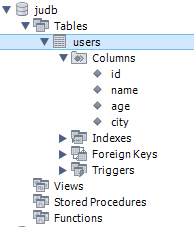

In [13]:
# 단일 데이터 삽입
sql = "INSERT INTO users (name, age, city) VALUES (%s, %s, %s)"
values = ("Alice", 25, "Seoul")
cursor.execute(sql, values)
conn.commit()
print("1개의 데이터 삽입 완료, ID:", cursor.lastrowid)

1개의 데이터 삽입 완료, ID: 1


In [16]:
# 여러개의 데이터 삽입
m_values=[("superman",33,"Busan"),("Cutegirl",17,"Incheon"),("Coolboy",22,"Jeju")]
cursor.executemany(sql, m_values)
conn.commit()
print("여러개의 데이터 삽입 완료!")

여러개의 데이터 삽입 완료!


In [21]:
# 모든 데이터 조회
que = "SELECT * FROM users"
cursor.execute(que)
users = cursor.fetchall()
# print(users)
for user in users:
    print(user)

(1, 'Alice', 25, 'Seoul')
(2, 'superman', 33, 'Busan')
(3, 'CUtegirl', 17, 'Incheon')
(4, 'Coolboy', 22, 'Jeju')
(5, 'superman', 33, 'Busan')
(6, 'CUtegirl', 17, 'Incheon')
(7, 'Coolboy', 22, 'Jeju')


In [29]:
que = "SELECT * FROM users"
filters = "WHERE age >= 24"
cursor.execute(que + filters)

filtered=cursor.fetchall()
for f in filtered:
    print(f)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '>= 24' at line 1

In [28]:
# 특정 사용자의 나이 수정
sql = "UPDATE users SET age = %s WHERE name = %s"
values = (29,"Alice")
cursor.execute(sql, values)
conn.commit()
conn.commit()
print("수정된 행 개수:", cursor.rowcount)

수정된 행 개수: 1


In [ ]:
# 특정 조건 사용자 삭제
que = "DELETE FROM users WHERE"
filters = "city = jeju"
cursor.exectue(que,filters)
conn.commit()
print(""{filters}에 해당되는 목록을 삭제하였습니다.")